<a href="https://colab.research.google.com/github/lazarod2311/IMDB-Reviews-classification-using-NLP-and-Big-Data/blob/main/Notebooks/IMDB_Reviews_classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Copia os dados para a pasta do Colab

In [ ]:
!cp /content/drive/MyDrive/imdb-reviews/imdb-reviews-pt-br.csv /content

Importar o PySpark e todos os componentes necessários


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 48 kB/s 
     |████████████████████████████████| 199 kB 60.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=d778bd25d04d66e034b23790988f926b3de2103516bdfa84961a63ddfd999585
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
spark = SparkSession.builder.getOrCreate()

Lendo e exibindo os dados

In [ ]:
imdbDf = spark.read.option("delimiter", '","').csv("/content/imdb-reviews-pt-br.csv", header = True)
imdbDf.show()

+---+--------------------+--------------------+-----------+
|"id|             text_en|             text_pt|sentiment""|
+---+--------------------+--------------------+-----------+
| "1|Once again Mr. Co...|Mais uma vez, o S...|      neg""|
| "2|This is an exampl...|Este é um exemplo...|      neg""|
| "3|First of all I ha...|Primeiro de tudo ...|      neg""|
| "4|Not even the Beat...|Nem mesmo os Beat...|      neg""|
| "5|Brass pictures mo...|Filmes de fotos d...|      neg""|
| "6|A funny thing hap...|Uma coisa engraça...|      neg""|
| "7|This German horro...|Este filme de ter...|      neg""|
| "8|Being a long-time...|Sendo um fã de lo...|      neg""|
| "9|""Tokyo Eyes"" te...|""Tokyo Eyes"" fa...|      neg""|
|"10|Wealthy horse ran...|Fazendeiros ricos...|      neg""|
|"11|Cage plays a drun...|Cage interpreta u...|      neg""|
|"12|First of all, I w...|Primeiro de tudo,...|      neg""|
|"13|So tell me - what...|Então me diga - q...|      neg""|
|"14|A big disappointm...|Uma grande dec

Tratamento dos dados utilizando expressões regulares

In [ ]:
imdbDf = imdbDf.select(col('"id').alias('id'), col('text_en').alias("text_en"), col('text_pt').alias("text_pt"), col('sentiment""').alias('sentiment'))
imdbDf = imdbDf.withColumn('id', when(imdbDf.id.startswith('"'),regexp_replace(imdbDf.id,'"','')))
imdbDf = imdbDf.withColumn('id', imdbDf.id.cast(IntegerType()))
imdbDf = imdbDf.withColumn('sentiment', when(imdbDf.sentiment.endswith('""'),regexp_replace(imdbDf.sentiment,'""','')))
imdbDf.show()

+---+--------------------+--------------------+---------+
| id|             text_en|             text_pt|sentiment|
+---+--------------------+--------------------+---------+
|  1|Once again Mr. Co...|Mais uma vez, o S...|      neg|
|  2|This is an exampl...|Este é um exemplo...|      neg|
|  3|First of all I ha...|Primeiro de tudo ...|      neg|
|  4|Not even the Beat...|Nem mesmo os Beat...|      neg|
|  5|Brass pictures mo...|Filmes de fotos d...|      neg|
|  6|A funny thing hap...|Uma coisa engraça...|      neg|
|  7|This German horro...|Este filme de ter...|      neg|
|  8|Being a long-time...|Sendo um fã de lo...|      neg|
|  9|""Tokyo Eyes"" te...|""Tokyo Eyes"" fa...|      neg|
| 10|Wealthy horse ran...|Fazendeiros ricos...|      neg|
| 11|Cage plays a drun...|Cage interpreta u...|      neg|
| 12|First of all, I w...|Primeiro de tudo,...|      neg|
| 13|So tell me - what...|Então me diga - q...|      neg|
| 14|A big disappointm...|Uma grande decepç...|      neg|
| 15|This film

In [ ]:
imdbDf = imdbDf.withColumn('text_en', regexp_replace(imdbDf.text_en,",", ""))
imdbDf = imdbDf.withColumn('text_en', regexp_replace(imdbDf.text_en," +", " "))
imdbDf = imdbDf.withColumn('text_en', regexp_replace(imdbDf.text_en,'"+', ""))
imdbDf = imdbDf.withColumn('text_en', lower(col('text_en')))

imdbDf = imdbDf.withColumn('text_pt', regexp_replace(imdbDf.text_pt,",", ""))
imdbDf = imdbDf.withColumn('text_pt', regexp_replace(imdbDf.text_pt,'"+', ""))
imdbDf = imdbDf.withColumn('text_pt', regexp_replace(imdbDf.text_pt," +", " "))
imdbDf = imdbDf.withColumn('text_pt', lower(col('text_pt')))
imdbDf.show()

+---+--------------------+--------------------+---------+
| id|             text_en|             text_pt|sentiment|
+---+--------------------+--------------------+---------+
|  1|once again mr. co...|mais uma vez o sr...|      neg|
|  2|this is an exampl...|este é um exemplo...|      neg|
|  3|first of all i ha...|primeiro de tudo ...|      neg|
|  4|not even the beat...|nem mesmo os beat...|      neg|
|  5|brass pictures mo...|filmes de fotos d...|      neg|
|  6|a funny thing hap...|uma coisa engraça...|      neg|
|  7|this german horro...|este filme de ter...|      neg|
|  8|being a long-time...|sendo um fã de lo...|      neg|
|  9|tokyo eyes tells ...|tokyo eyes fala d...|      neg|
| 10|wealthy horse ran...|fazendeiros ricos...|      neg|
| 11|cage plays a drun...|cage interpreta u...|      neg|
| 12|first of all i wo...|primeiro de tudo ...|      neg|
| 13|so tell me - what...|então me diga - q...|      neg|
| 14|a big disappointm...|uma grande decepç...|      neg|
| 15|this film

Contagem de palavras por sentença

In [ ]:
imdbDf = imdbDf.withColumn("en_count", size(split(imdbDf.text_en, " ")))
imdbDf = imdbDf.withColumn("pt_count", size(split(imdbDf.text_pt, " ")))
imdbDf.show()

+---+--------------------+--------------------+---------+--------+--------+
| id|             text_en|             text_pt|sentiment|en_count|pt_count|
+---+--------------------+--------------------+---------+--------+--------+
|  1|once again mr. co...|mais uma vez o sr...|      neg|     168|     168|
|  2|this is an exampl...|este é um exemplo...|      neg|     232|     245|
|  3|first of all i ha...|primeiro de tudo ...|      neg|     215|     213|
|  4|not even the beat...|nem mesmo os beat...|      neg|     308|     324|
|  5|brass pictures mo...|filmes de fotos d...|      neg|     238|     244|
|  6|a funny thing hap...|uma coisa engraça...|      neg|     115|     116|
|  7|this german horro...|este filme de ter...|      neg|     156|     161|
|  8|being a long-time...|sendo um fã de lo...|      neg|     136|     146|
|  9|tokyo eyes tells ...|tokyo eyes fala d...|      neg|     129|     130|
| 10|wealthy horse ran...|fazendeiros ricos...|      neg|     160|     167|
| 11|cage pl

Selecionando somente os textos que o sentimento foi classificado corretamente

In [ ]:
imdbDfneg = imdbDf.where(imdbDf.sentiment == 'neg')
imdbDfpos = imdbDf.where(imdbDf.sentiment == 'pos')
imdbDfconcat = imdbDfneg.union(imdbDfpos)
imdbDfconcat.show()

+---+--------------------+--------------------+---------+--------+--------+
| id|             text_en|             text_pt|sentiment|en_count|pt_count|
+---+--------------------+--------------------+---------+--------+--------+
|  1|once again mr. co...|mais uma vez o sr...|      neg|     168|     168|
|  2|this is an exampl...|este é um exemplo...|      neg|     232|     245|
|  3|first of all i ha...|primeiro de tudo ...|      neg|     215|     213|
|  4|not even the beat...|nem mesmo os beat...|      neg|     308|     324|
|  5|brass pictures mo...|filmes de fotos d...|      neg|     238|     244|
|  6|a funny thing hap...|uma coisa engraça...|      neg|     115|     116|
|  7|this german horro...|este filme de ter...|      neg|     156|     161|
|  8|being a long-time...|sendo um fã de lo...|      neg|     136|     146|
|  9|tokyo eyes tells ...|tokyo eyes fala d...|      neg|     129|     130|
| 10|wealthy horse ran...|fazendeiros ricos...|      neg|     160|     167|
| 11|cage pl

In [ ]:
imdbDfconcat.select('sentiment').distinct().show()

+---------+
|sentiment|
+---------+
|      neg|
|      pos|
+---------+



In [ ]:
lst = imdbDfconcat.select('sentiment').distinct().rdd.flatMap(lambda x: x).collect()
lst

['neg', 'pos']

Etapa 2: Processamento de linguagem natural

Importando as bibliotecas

In [1]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.1 MB/s 


In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import text_to_word_sequence
import re, os
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import GRU, Bidirectional
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tqdm import tqdm
import glob
from pathlib import Path
import nltk
from unidecode import unidecode

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def get_words(data):
  stop_words = set(stopwords.words('portuguese'))
  stop_words = [unidecode(s) for s in stop_words]
  text = []
  text_aux = []
  text_categ = {}
  for sentiment in data.select('sentiment').distinct().rdd.flatMap(lambda x: x).collect():
    data_aux = data.where(data.sentiment == sentiment)
    for row in data_aux.select('text_pt').rdd.flatMap(lambda x: x).collect():
      word_list = text_to_word_sequence(row)
      no_stop_words = [w for w in word_list if not w in stop_words]
      no_stop_words = " ".join(no_stop_words)
      text_aux.append(no_stop_words)
    text_categ[sentiment] = text_aux
    text_aux = []
  for row in data.select('text_pt').rdd.flatMap(lambda x: x).collect():
    word_list = text_to_word_sequence(row)
    no_stop_words = [w for w in word_list if not w in stop_words]
    no_stop_words = " ".join(no_stop_words)
    text.append(no_stop_words)

  return text, text_categ

In [ ]:
words, classified_words = get_words(imdbDfconcat)

Tokenização das palavras para uso no classificador

In [ ]:
tokenizer = Tokenizer(num_words=5000, split=' ')

tokenizer.fit_on_texts(words)
X = tokenizer.texts_to_sequences(words)  
    
X = pad_sequences(X, maxlen=300)

word_index = tokenizer.word_index
Y = pd.get_dummies(imdbDfconcat.select('sentiment').rdd.flatMap(lambda x: x).collect()).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

Definindo o modelo a ser usado (Rede GRU)

In [ ]:
def model():
    input_shape = (300,)
    model_input = Input(shape=input_shape, name="input", dtype='int32')    
    embedding = Embedding(5000, 128, input_length=300, name="embedding")(model_input)
    gru = GRU(128, name="gru", dropout = 0.25, recurrent_dropout = 0.25)(embedding)
    model_output = Dense(2, activation='softmax', name="softmax")(gru)
    model = Model(inputs=model_input, outputs=model_output)
    return model

In [ ]:
model = model()

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 128)          640000    
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 softmax (Dense)             (None, 2)                 258       
                                                                 
Total params: 739,330
Trainable params: 739,330
Non-trainable params: 0
_________________________________________________________________
None


Treinando o modelo

Epoch 1/5
1153/1153 [==============================] - 1204s 1s/step - loss: 0.3511 - accuracy: 0.8488 - val_loss: 0.2890 - val_accuracy: 0.8833
Epoch 2/5
1153/1153 [==============================] - 1182s 1s/step - loss: 0.2271 - accuracy: 0.9113 - val_loss: 0.2802 - val_accuracy: 0.8897
Epoch 3/5
1153/1153 [==============================] - 1176s 1s/step - loss: 0.1727 - accuracy: 0.9353 - val_loss: 0.2870 - val_accuracy: 0.8897
Epoch 4/5
1153/1153 [==============================] - 1182s 1s/step - loss: 0.1361 - accuracy: 0.9491 - val_loss: 0.3022 - val_accuracy: 0.8855
Epoch 5/5
1153/1153 [==============================] - 1178s 1s/step - loss: 0.1055 - accuracy: 0.9625 - val_loss: 0.3609 - val_accuracy: 0.8813


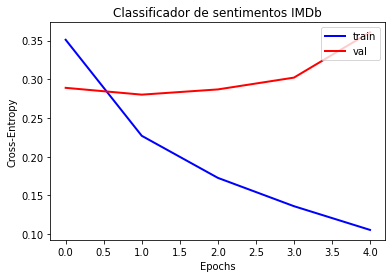

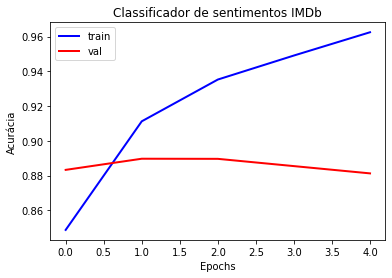

In [ ]:
hist = model.fit(
        X_train, 
        Y_train, 
        validation_data=(X_test, Y_test),
        epochs=5,
        batch_size=30, 
        shuffle=True,
        verbose=1)

model.save_weights(f"/content/drive/MyDrive/imdb-reviews/modelo.h5")    


plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('Classificador de sentimentos IMDb')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(loc='upper right')
plt.show()

plt.figure()
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('Classificador de sentimentos IMDb')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend(loc='upper left')
plt.show()

Carregando o modelo treinado

In [ ]:
model.load_weights(f"/content/drive/MyDrive/imdb-reviews/modelo.h5")
tokenizer = Tokenizer(num_words=5000, split=' ')

In [ ]:
while True:
    sentence = input("input> ")

    if sentence == "exit":
        break
    
    new_text = [sentence]
    tokenizer.fit_on_texts(new_text)
    new_text = tokenizer.texts_to_sequences(new_text)

    new_text = pad_sequences(new_text, maxlen=300)

    sentiment = model.predict(new_text,batch_size=1,verbose = 1)[0]

    if(np.argmax(sentiment) == 0):
        pred_proba = "%.2f%%" % (sentiment[0]*100)
        print("negativo => ", pred_proba)
    elif (np.argmax(sentiment) == 1):
        pred_proba = "%.2f%%" % (sentiment[1]*100)
        print("positivo => ", pred_proba)